In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [2]:
results_dir = '../evaluating_responses/part_3/'

In [3]:
part3res = os.listdir(results_dir)
part3res = [filename for filename in part3res if 'gemini20' in filename]
gemini = pd.read_csv(results_dir+part3res[0])
for filename in part3res[1:]:
    next_df = pd.read_csv(results_dir+filename)
    gemini = pd.concat([gemini, next_df])
    print(gemini.shape)
gemini.head()

(300, 12)
(450, 12)
(600, 12)
(693, 12)
(843, 12)
(873, 12)
(1023, 12)


,Culture,Size,Instance,Question,Question_Type,Prompt,Answer,Correctness,Response,Input_Tokens,Output_Tokens,Remarks
0,ic,50,0,"Who is agent W6's, 4-most preferred agent?",level_1,You are an AI assistant tasked with analyzing ...,M22,1,M22\n,19877,4,Processed smoothly.
1,ic,50,0,"Would agent W40, prefer M24 and M34 over M31?",level_2,You are an AI assistant tasked with analyzing ...,yes,0,NO\n,19876,2,Processed smoothly.
2,ic,50,0,"If agent W40 is currently engaged to M31, woul...",level_2_noisy,You are an AI assistant tasked with analyzing ...,yes,0,NO\n,19883,2,Processed smoothly.
3,ic,50,1,"Who is agent W38's, 25-most preferred agent?",level_1,You are an AI assistant tasked with analyzing ...,M37,0,<answer>M26</answer>,19879,9,Processed smoothly.
4,ic,50,1,"Would agent W35, prefer M24 or M40 over M36?",level_2,You are an AI assistant tasked with analyzing ...,yes,1,YES\n,19876,2,Processed smoothly.


In [12]:
gemini = gemini.drop(['Input_Tokens','Output_Tokens','Remarks'], axis=1)

gemini.groupby(['Culture', 'Size','Question_Type']).mean(['Correctness'])

Instance  Correctness
Culture     Size Question_Type                       
ic          5    level_1            15.0     1.000000
                 level_2            15.0     0.741935
                 level_2_noisy      15.0     0.612903
            10   level_1            24.5     1.000000
                 level_2            24.5     0.520000
                 level_2_noisy      24.5     0.640000
            20   level_1            24.5     0.920000
                 level_2            24.5     0.460000
                 level_2_noisy      24.5     0.460000
            50   level_1            24.5     0.200000
                 level_2            24.5     0.500000
                 level_2_noisy      24.5     0.420000
womanmaster 5    level_1             4.5     1.000000
                 level_2             4.5     0.600000
                 level_2_noisy       4.5     0.400000
            10   level_1            24.5     0.980000
                 level_2            24.5     0.600000
                 level_2_noisy      24.5     0.660000
            20   level_1            24.5     0.760000
                 level_2            24.5     0.540000
                 level_2_noisy      24.5     0.560000
            50   level_1            24.5     0.220000
                 level_2            24.5     0.540000
                 level_2_noisy      24.5     0.560000

In [60]:
model = 'deepseek'

part3res = os.listdir(results_dir)
part3res = [filename for filename in part3res if model in filename and 'csv' in filename and 'cleaned' not in filename and 'dist' not in filename]
print(part3res)
model_data = pd.read_csv(results_dir+part3res[0])
for filename in part3res[1:]:
    next_df = pd.read_csv(results_dir+filename)
    model_data = pd.concat([model_data, next_df])

model_data = model_data.drop(['Input_Tokens','Output_Tokens','Remarks'], axis=1)

data = [['Culture', 'Size', 'Instance', 'Type', 'Correct', 'Correctness', 'Response']]

for row in model_data.values:
    response = row[-1]
    correct = row[6].lower()
    correctness = 0
    if row[1] < 10: continue
    if '<answer>' in response:
        response = response.split('<answer>')[-1]
    if '</answer>' in response:
        response = response.split('</answer')[0]
    ans = response[-50:].strip().replace('\n', '').lower()
    if correct in ans:
        correctness = 1
    data.append([row[0], row[1], row[2], row[4], row[6], correctness, ans])

with open(results_dir + f"{model}_cleaned.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)


['deepseek_ic_5_pt3.csv', 'deepseek_womanmaster_10_pt3.csv', 'deepseek_womanmaster_5_pt3.csv', 'deepseek_ic_20_pt3.csv', 'deepseek_ic_50_pt3.csv', 'deepseek_ic_10_pt3.csv', 'deepseek_womanmaster_20_pt3.csv', 'deepseek_womanmaster_50_pt3.csv']


In [5]:
llama = pd.read_csv(results_dir+'llama33.csv')
llama.head()

,Culture,Size,Instance,Question,Question_Type,Prompt,Correct,Correctness,Response
0,ic,5,0,"Who is agent W2's, 1-most preferred agent?",level_1,You are an AI assistant tasked with analyzing ...,M1,0,<answer>M1</answer>
1,ic,5,0,"Would agent W1, prefer M3 or M2 over M4?",level_2,You are an AI assistant tasked with analyzing ...,yes,1,<answer>YES</answer>
2,ic,5,0,"If agent W1 is currently engaged to M4, would ...",level_2_noisy,You are an AI assistant tasked with analyzing ...,yes,1,<answer>YES</answer>
3,ic,5,1,"Who is agent W2's, 3-most preferred agent?",level_1,You are an AI assistant tasked with analyzing ...,M5,0,<answer>M5</answer>
4,ic,5,1,"Would agent W1, prefer M1 and M2 over M3?",level_2,You are an AI assistant tasked with analyzing ...,no,1,<answer>YES</answer>


In [6]:
cleaned = []
unaddressed = []
with open(results_dir+'llama33.csv', 'r') as file:
    reader = csv.reader(file)
    i = 0
    for row in reader:
        # print(len(row), row[-1])
        if i > 1010: break
        i += 1
        if len(row) > 9:
            print(i)
            print(row)
            # break

In [8]:
qwen = pd.read_csv(results_dir+'qwen_qwq.csv')
qwen.head()

,Culture,Size,Instance,Question,Question_Type,Prompt,Correct,Correctness,Response
0,ic,5,2,"If agent W5 is currently engaged to M3, would ...",level_2_noisy,You are an AI assistant tasked with analyzing ...,no,0,"Alright, I've got this problem here about matc..."
1,ic,5,3,"Who is agent W5's, 1-most preferred agent?",level_1,You are an AI assistant tasked with analyzing ...,M5,0,"Alright, I've got this task here. I need to an..."
2,ic,5,3,"If agent W1 is currently engaged to M3, would ...",level_2_noisy,You are an AI assistant tasked with analyzing ...,no,0,"Alright, I've got this problem here about matc..."
3,ic,5,4,"Who is agent W2's, 4-most preferred agent?",level_1,You are an AI assistant tasked with analyzing ...,M2,0,"Alright, I've got this task here. I need to an..."
4,ic,5,4,"Would agent W3, prefer M4 and M2 over M1?",level_2,You are an AI assistant tasked with analyzing ...,no,0,"Alright, I've got this task here. I need to an..."


In [10]:
for row in qwen.values[:5]:
    print(row[-1][-100:])

O.

I don't think there's any room for confusion here.

So, my final answer is:

<answer>NO</answer>
Yes, M5 is first, so that's the most preferred.

No doubts here.

**Final Answer**

\[ \boxed{M5} \]
ense.

I think the first interpretation is correct.

So, my final answer is NO.

<answer>NO</answer>
lude any explanations or additional information.

Alright, done.

**Final Answer**

\[ \boxed{M2} \]
based on the preference list, the answer should be NO.

So, my final answer is:

<answer>NO</answer>


In [3]:
data = [['Culture', 'Size', 'Instance', 'Type', 'Correct', 'Correctness', 'Response']]

model = 'ds_llama_8b'
model_data = pd.read_csv(results_dir+f'{model}.csv')

for row in model_data.values:
    response = row[-1]
    correctness = 0
    correct = row[6].lower()
    if '<answer>' in response:
        response = response.split('<answer>')[-1]
    if '</answer>' in response:
        response = response.split('</answer')[0]
    ans = response[-50:].strip().replace('\n', '').lower()
    if correct in ans:
        correctness = 1
    data.append([row[0], row[1], row[2], row[4], row[6], correctness, ans])

with open(results_dir + f"{model}_cleaned.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

In [4]:
data = [['Model', 'Size', 'Type', 'Fraction']]
file_names = {
    'DeepSeek-8B': 'ds_llama_8b_cleaned.csv',
    'Llama-3.3-70B': 'llama33_cleaned.csv',
    'Gemini-2.0-Flash': 'gemini20_cleaned.csv',
    'Qwen-QwQ-32B': 'qwen_qwq_cleaned.csv',
    'DeepSeek-70B': 'deepseek_dist_cleaned.csv',
    'OA-o3-mini': 'o3-mini_cleaned.csv',
    'DeepSeek-R1': 'deepseek_cleaned.csv',
    'Gemini-2.5-Pro': 'gemini25_cleaned.csv',
}
levels = {
    'L1': 'level_1',
    'L2': 'level_2',
    'L3': 'level_2_noisy'
}

size_names = {
     10: "Easy",
     20: "Medium",
     50: "Hard"
}

for model in file_names:
    model_data = pd.read_csv(results_dir+file_names[model])
    for size in [10, 20, 50]:
        for level in levels:
            subset = model_data[(model_data['Size'] == size) & (model_data['Type'] == levels[level])]
            fraction = round(sum(subset['Correctness'].values)/100, 2)
            data.append([model, size_names[size], level, fraction])

with open(results_dir + f"combined.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

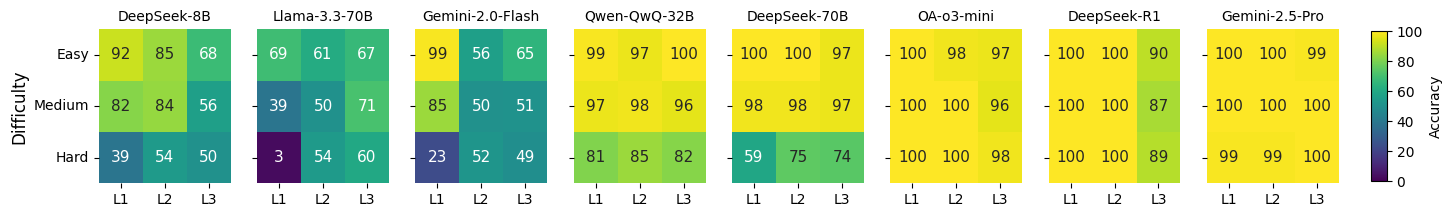

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('../evaluating_responses/part_3/combined.csv')

# Define main layout components

sizes = df['Size'].unique()
models = df['Model'].unique()
all_types = df['Type'].unique()
missing_color = 'lightgrey'

# Color scale range
vmin = 0
vmax = 100


size_names = {
     10: "Easy",
     20: "Medium",
     50: "Hard"
}

# cmap = sns.cubehelix_palette(start=2, rot=0, dark=0.4, light=1.5, reverse=False, as_cmap=True)

# Create main figure
fig, axs = plt.subplots(nrows=1, ncols=len(models), figsize=(2 * len(models), 2))

for c, (ax, model) in enumerate(zip(axs, models)):
    # Filter the relevant data
    ax.set_title(model, fontsize=10)
    subset = df[df['Model'] == model]

    # Initialize empty matrix
    heat_data = pd.DataFrame(index=sizes, columns=all_types, dtype=float)

    for _, row in subset.iterrows():
        heat_data.at[row['Size'], row['Type']] = row['Fraction']*100

    mask = heat_data.isnull()

    sns.heatmap(
        heat_data.astype(int),
        mask=mask,
        ax=ax,
        annot=True,
        fmt="d",
        cmap='viridis',
        cbar=False,
        vmin=vmin,
        vmax=vmax,
        annot_kws={'size': 11}
        # linewidths=0.5,
        # linecolor='black'
    )

    if c == 0: 
        ax.set_ylabel('Difficulty', fontsize=12)
        ax.set_yticklabels(sizes, rotation=0)
    else:
        ax.set_yticklabels(['']*3)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.tick_params(axis='both', labelsize=10)


# Add one colorbar to the side of the entire figure
cbar_ax = fig.add_axes([0.92, 0.12, 0.01, 0.75])  # [left, bottom, width, height]
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label='Accuracy')
cbar_ax.set_label('Accuracy')
cbar_ax.tick_params(labelsize=10)


# fig.suptitle('Heatmaps of Fraction by Size and Type', fontsize=20, y=0.99)
plt.savefig(results_dir+"accuracy_heatmap.pdf", bbox_inches="tight")
plt.show()
